In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
!nvidia-smi

Fri Aug 20 18:25:48 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    27W /  70W |    220MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.densenet import DenseNet169
from keras.applications.densenet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [256, 128]

In [ ]:
#Nahid
#train_path = '/content/drive/MyDrive/BRAC /Past Courses/Thesis/Thesis Final/ResNET/Dataset/Train'

#Shormi
train_path = '/content/drive/MyDrive/Thesis/Dataset/Others/Train'

In [ ]:
#Nahid
#valid_path = '/content/drive/MyDrive/BRAC /Past Courses/Thesis/Thesis Final/ResNET/Dataset/Test'

#Shormi
valid_path = '/content/drive/MyDrive/Thesis/Dataset/Others/Test'

In [ ]:
# add preprocessing layer to the front of VGG

densenet = DenseNet169(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

51888128/51877672 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in densenet.layers:
  layer.trainable = False

In [ ]:
#useful for getting number of classes

#Nahid
#folders = glob('/content/drive/MyDrive/BRAC /Past Courses/Thesis/Thesis Final/ResNET/Dataset/Train/*')

#Shormi
folders = glob('/content/drive/MyDrive/Thesis/Dataset/Others/Train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(densenet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=densenet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 262, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 128, 64, 64)  9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 128, 64, 64)  256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size

#Nahid
#training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/BRAC /Past Courses/Thesis/Thesis Final/ResNET/Dataset/Train',
                                                 #target_size = (256, 128),
                                                 #batch_size = 5,
                                                 #class_mode = 'categorical')

#Shormi
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Thesis/Dataset/Others/Train',
                                                 target_size = (256, 128),
                                                 batch_size = 5,
                                                 class_mode = 'categorical')

Found 270 images belonging to 2 classes.


In [ ]:
#Nahid
#test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/BRAC /Past Courses/Thesis/Thesis Final/ResNET/Dataset/Test',
                                            #target_size = (256, 128),
                                            #batch_size = 5,
                                            #class_mode = 'categorical')

#Shormi
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Thesis/Dataset/Others/Test',
                                            target_size = (256, 128),
                                            batch_size = 5,
                                            class_mode = 'categorical')

Found 90 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

# save it as a h5 file


from tensorflow.keras.models import load_model

#Shormi
model.save('/content/drive/MyDrive/Thesis/Model/DenseNet169/KS10')

Epoch 1/10
 1/54 [..............................] - ETA: 5s - loss: 2.3830 - accuracy: 0.6000

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


54/54 [==============================] - 5s 90ms/step - loss: 0.6986 - accuracy: 0.8519 - val_loss: 3.3075 - val_accuracy: 0.7111
Epoch 2/10
54/54 [==============================] - 5s 89ms/step - loss: 0.4811 - accuracy: 0.8815 - val_loss: 2.7815 - val_accuracy: 0.5556
Epoch 3/10
54/54 [==============================] - 5s 99ms/step - loss: 0.4829 - accuracy: 0.8963 - val_loss: 2.4719 - val_accuracy: 0.6667
Epoch 4/10
54/54 [==============================] - 5s 89ms/step - loss: 0.9471 - accuracy: 0.8741 - val_loss: 2.9328 - val_accuracy: 0.6222
Epoch 5/10
54/54 [==============================] - 5s 89ms/step - loss: 0.4422 - accuracy: 0.9074 - val_loss: 2.6108 - val_accuracy: 0.6889
Epoch 6/10
54/54 [==============================] - 5s 90ms/step - loss: 0.4872 - accuracy: 0.9296 - val_loss: 2.5767 - val_accuracy: 0.7333
Epoch 7/10
54/54 [==============================] - 5s 90ms/step - loss: 0.6879 - accuracy: 0.8667 - val_loss: 3.8675 - val_accuracy: 0.5556
Epoch 8/10
54/54 [======

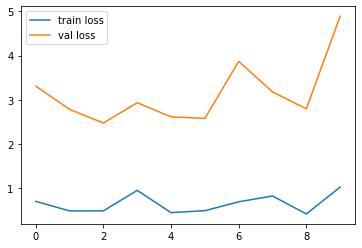

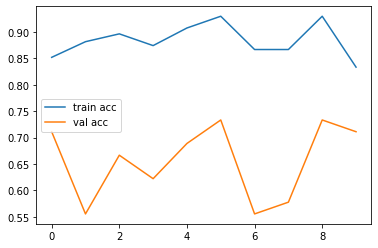

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')